In [1]:
#pip install findspark
import findspark
findspark.init("C:\spark")
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

spark=SparkSession.builder\
    .master("local")\
    .appName("spark deneme")\
    .config("spark.executer.memory","16gb")\
    .getOrCreate()
sc=spark.sparkContext

In [2]:
spark_df=spark.read.csv("churn.csv",header=True,sep=",",inferSchema=True)
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [3]:
spark_df.show(2)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 2 rows



In [4]:
spark_df.count()

900

In [5]:
len(spark_df.columns)

8

In [6]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [7]:
spark_df=spark_df.withColumnRenamed("_c0","index")

In [8]:
# tüm column'lar küçük harfe çevrildi
spark_df=spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [9]:
spark_df.printSchema()

root
 |-- index: integer (nullable = true)
 |-- names: string (nullable = true)
 |-- age: double (nullable = true)
 |-- total_purchase: double (nullable = true)
 |-- account_manager: integer (nullable = true)
 |-- years: double (nullable = true)
 |-- num_sites: double (nullable = true)
 |-- churn: integer (nullable = true)



In [10]:
#Tüm verileri eşsiz mi?
spark_df.distinct().count()

900

In [11]:
#isim olarak aynı olanlar var mı?
spark_df.select("names").distinct().count()
# iki tane aynı isimden var

899

In [12]:
spark_df.groupBy("names").count().sort("count",ascending=False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|   Jennifer Wood|    2|
|     John Barber|    1|
|Patrick Robinson|    1|
+----------------+-----+
only showing top 3 rows



In [13]:
#Jennifer Wood isim benzerliği mi yoksa aynı kişi mi?
spark_df.filter(spark_df.names=="Jennifer Wood").show()
#farklı kişiler

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [14]:
#farklı kişi değil de aynı kişi olsaydı kaldırmak için
spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count",ascending=False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [15]:
# istenilen index e erişmek için
spark_df.where(spark_df.index==439).show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [16]:
spark_df.where(spark_df.names=="Patrick Robinson").show()
#spark_df.filter(spark_df.names=="Patrick Robinson").show()

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|   85|Patrick Robinson|47.0|        7396.1|              0| 4.11|     11.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+



In [17]:
#birşeyi string olarak yakalamak için Örnek olarak Jennifer Wood elde etmek için
spark_df.where(spark_df.index==439).select("names").show()

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [18]:
spark_df.where(spark_df.index==439).collect()[0]["names"]

'Jennifer Wood'

In [19]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [20]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [21]:
spark_df.select('age','total_purchase','account_manager','years','num_sites','churn').describe().show()

+-------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|              900|              900|               900|              900|               900|                900|
|   mean|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|             22.0|            100.0|                 0|              1.0|               3.0|                  0|
|    max|             65.0|         18026.01|                 1|             9.15|              14.0|                  1|
+-------+---------------

In [22]:
spark_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
index,900,449.5,259.95191863111916,0,899
names,900,None,None,Aaron King,Zachary Walsh
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [23]:
import seaborn as sns

In [24]:
pandas_df=spark_df.drop("index","names").toPandas()

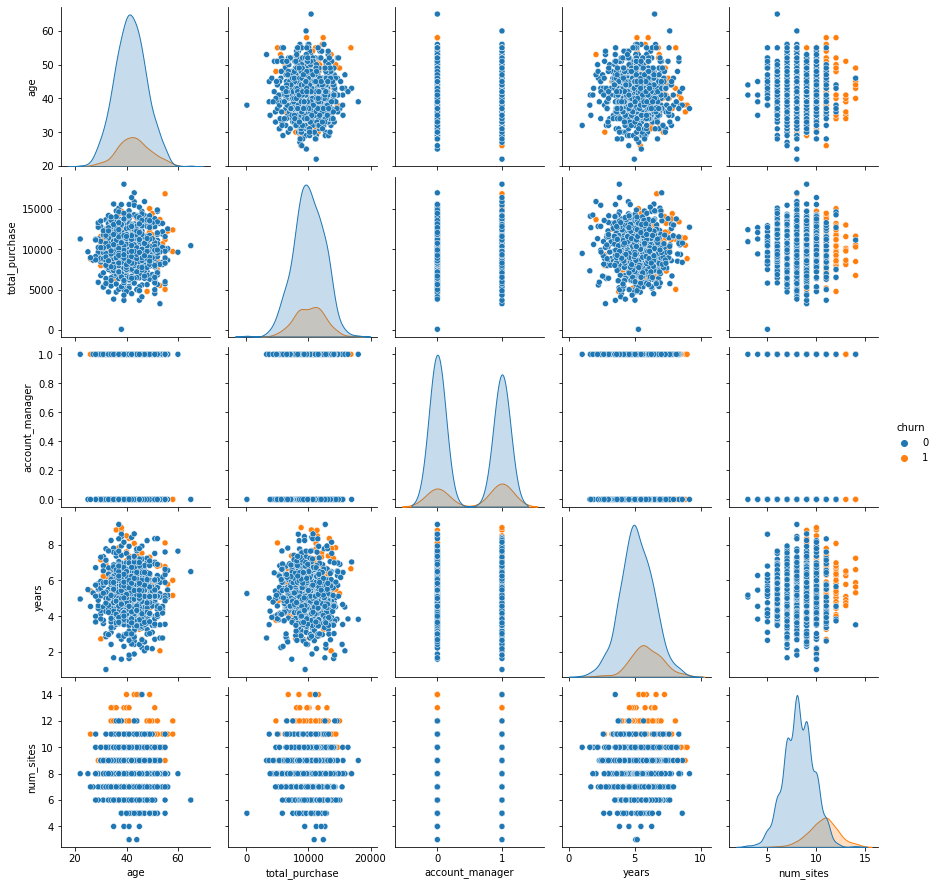

In [25]:
sns.pairplot(pandas_df,hue="churn");

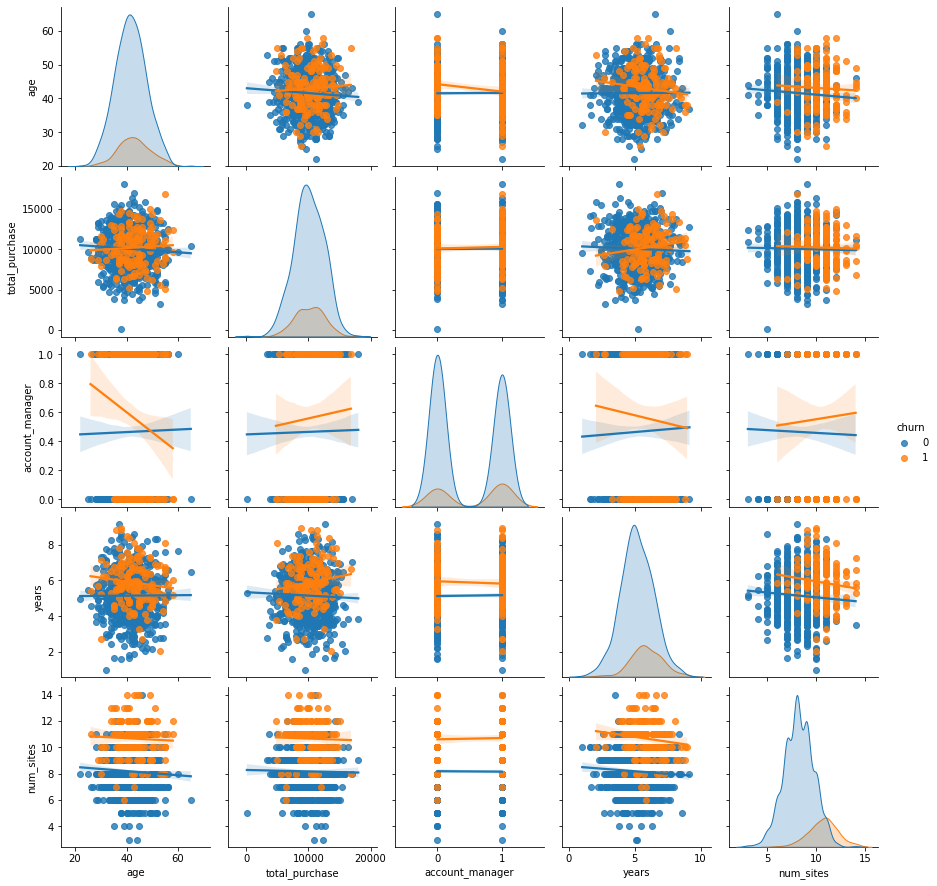

In [26]:
sns.pairplot(pandas_df,hue="churn",kind="reg");

In [27]:
spark_df=spark_df.dropna()

In [28]:
spark_df=spark_df.withColumn("age_sqrt",spark_df.age**2)

In [29]:
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_sqrt|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 3 rows



In [30]:
#bağımlı değişkeni label olarak atama adımı
from pyspark.ml.feature import StringIndexer
stringIndexer=StringIndexer(inputCol="churn",outputCol="label")

In [31]:
indexed=stringIndexer.fit(spark_df).transform(spark_df)

In [32]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_sqrt', 'double'),
 ('label', 'double')]

In [33]:
spark_df=indexed.withColumn("label",indexed.label.cast("integer"))

In [34]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_sqrt', 'double'),
 ('label', 'int')]

In [41]:
# bağımsız değişkenlerin ayarlanması
from pyspark.ml.feature import VectorAssembler
bag_deg=['age','total_purchase','account_manager','years','num_sites']

In [43]:
vectorAssembler=VectorAssembler(inputCols=bag_deg,outputCol="features")

In [46]:
features_deg=vectorAssembler.transform(spark_df)

In [53]:
final_df=features_deg.select("features","label")
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



In [54]:
final_df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: integer (nullable = true)



In [55]:
splits=final_df.randomSplit([0.7,0.3])

In [65]:
train_df=splits[0]
test_df=splits[1]

In [66]:
train_df.count(),test_df.count()

(628, 272)

In [68]:
from pyspark.ml.classification import GBTClassifier

In [69]:
gbm=GBTClassifier(maxIter=10,featuresCol="features",labelCol="label")

In [70]:
gbm_model=gbm.fit(train_df)

In [71]:
y_pred=gbm_model.transform(test_df)

In [73]:
y_pred.show(2)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[25.0,9672.03,0.0...|    0|[1.20885662949660...|[0.91816809344864...|       0.0|
|[28.0,11204.23,0....|    0|[-0.8212881025732...|[0.16211482266675...|       1.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 2 rows



In [78]:
ac=y_pred.select("label","prediction")
ac.show(3)

+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       1.0|
|    0|       0.0|
+-----+----------+
only showing top 3 rows



In [79]:
ac.filter(ac.label==ac.prediction).count()/ac.count()

0.875

In [80]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder,CrossValidator

In [82]:
evaluator=BinaryClassificationEvaluator()
pramGrid=(ParamGridBuilder()
         .addGrid(gbm.maxDepth,[2,4,6])
         .addGrid(gbm.maxBins,[20,30])
         .addGrid(gbm.maxIter,[10,20])
         .build())

cv=CrossValidator(estimator=gbm,estimatorParamMaps=pramGrid,evaluator=evaluator,numFolds=10)

In [83]:
cv_model=cv.fit(train_df)
y_pred=cv_model.transform(test_df)

In [85]:
y_pred.show(2)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[25.0,9672.03,0.0...|    0|[1.24347276217052...|[0.92322157041152...|       0.0|
|[28.0,11204.23,0....|    0|[0.61028576115003...|[0.77216411109649...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 2 rows



In [88]:
ac=y_pred.select("label","prediction")

In [89]:
ac.filter(ac.label==ac.prediction).count()/ac.count()

0.9117647058823529

In [91]:
evaluator.evaluate(y_pred)

0.9215274345032131

## Modeli Deneyelim

In [92]:
import pandas as pd

In [93]:
client_df=pd.read_csv("clients.txt")

In [95]:
#bu tabloyu spark diline çevirelim
client_df

,names,age,total_purchase,account_manager,years,num_sites
0,Enes ASAN,31,8000,1,9,35
1,Selin ASAN,31,7300,0,7,30
2,Defne ASAN,3,1500,0,0,2
3,Sefa ASAN,26,5000,1,1,12


In [96]:
client_spark=spark.createDataFrame(client_df)

In [97]:
client_spark.show()

+----------+---+--------------+---------------+-----+---------+
|     names|age|total_purchase|account_manager|years|num_sites|
+----------+---+--------------+---------------+-----+---------+
| Enes ASAN| 31|          8000|              1|    9|       35|
|Selin ASAN| 31|          7300|              0|    7|       30|
|Defne ASAN|  3|          1500|              0|    0|        2|
| Sefa ASAN| 26|          5000|              1|    1|       12|
+----------+---+--------------+---------------+-----+---------+



In [105]:
client_vector=vectorAssembler.transform(client_spark)

In [106]:
client_vector.show()

+----------+---+--------------+---------------+-----+---------+--------------------+
|     names|age|total_purchase|account_manager|years|num_sites|            features|
+----------+---+--------------+---------------+-----+---------+--------------------+
| Enes ASAN| 31|          8000|              1|    9|       35|[31.0,8000.0,1.0,...|
|Selin ASAN| 31|          7300|              0|    7|       30|[31.0,7300.0,0.0,...|
|Defne ASAN|  3|          1500|              0|    0|        2|[3.0,1500.0,0.0,0...|
| Sefa ASAN| 26|          5000|              1|    1|       12|[26.0,5000.0,1.0,...|
+----------+---+--------------+---------------+-----+---------+--------------------+



In [110]:
results=cv_model.transform(client_vector)
results.select("names","prediction").show()

+----------+----------+
|     names|prediction|
+----------+----------+
| Enes ASAN|       1.0|
|Selin ASAN|       1.0|
|Defne ASAN|       0.0|
| Sefa ASAN|       0.0|
+----------+----------+

